The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! You can grab the dataset here https://www.kaggle.com/datasets/camnugent/california-housing-prices 

The goal of this homework is to create a regression model for predicting housing prices (column `median_house_value`).

Concentrate only on the following columns in your code

`latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'`

1. Perform EDA on the data
2. Clean up the data (make sure you check for missing values and outliers and treat appropriately)
3. Explore the data and try to answer different analytical questions (at least three on your own)
4. Seperate the data into features and label/target
5. Divide the data into train and test sets in ratio 80/20
6. Ft a regression model without regularization (i.e using just linear regression)
7. Fit another model with regularization
8. Use your best model to make predictions for new houses

In [3]:
# for data manipulation and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# silence any future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Data preparation

In [4]:
#get a technical summary
housing_df = pd.read_csv("housing.csv")
housing_df.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


 There are 20640 rows and 10 columns in the data and it occupies 1.6+ MB . There also 2 type data type present which is float and string (object)

In [5]:
#first five rows
housing_df.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
#last five rows
housing_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [53]:
# ten random rows
housing_df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3831,-118.43,34.20,29.0,3051.0,694.0,1942.0,679.0,3.1118,238100.0,<1H OCEAN
9591,-120.45,37.32,21.0,1318.0,202.0,618.0,197.0,4.8214,117800.0,INLAND
1642,-121.78,37.97,4.0,17032.0,2546.0,7653.0,2359.0,5.5601,213700.0,INLAND
3019,-119.42,35.19,26.0,890.0,172.0,483.0,170.0,4.1500,68200.0,INLAND
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY
13736,-117.20,34.04,23.0,1762.0,267.0,1132.0,279.0,5.9915,153200.0,INLAND
7660,-118.22,33.84,38.0,1928.0,429.0,1358.0,399.0,4.0687,160300.0,<1H OCEAN
8703,-118.34,33.84,36.0,1561.0,252.0,740.0,253.0,6.2778,309700.0,<1H OCEAN
10507,-117.68,33.54,5.0,2840.0,403.0,1363.0,403.0,7.6180,341400.0,<1H OCEAN
15924,-122.44,37.72,52.0,1775.0,347.0,1102.0,367.0,4.3125,267200.0,NEAR BAY


In [54]:
# summary for numeric columns
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [17]:
# check for missing values
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [6]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
# Let's drop some columns
column_to_drop = ['ocean_proximity']
housing_df.drop(column_to_drop, axis=1, inplace=True)

In [8]:
housing_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0


Data cleaning

Treating the missing value
 Fill the missing values with the mean of the respective column
 ##total_bedroom column

In [10]:
housing_df['total_bedrooms'].fillna(method='ffill',inplace=True)

In [11]:
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [58]:
housing_df.shape

(20640, 9)

check for outliers

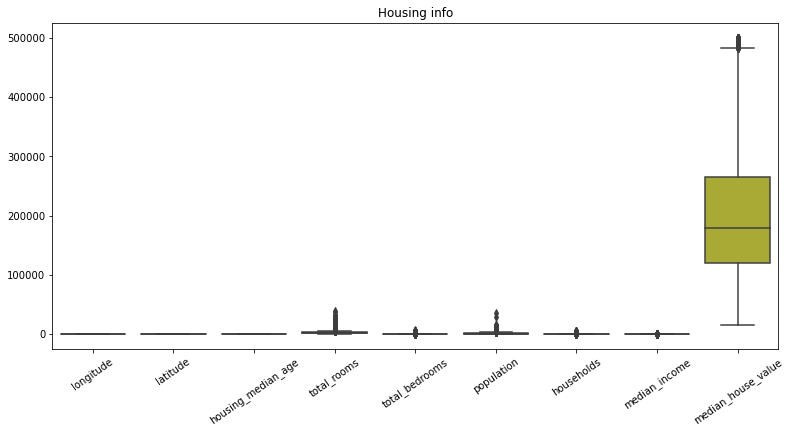

In [59]:
plt.figure(figsize=(13,6))
ax = sns.boxplot(data = housing_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=35)
plt.title("Housing info")
plt.show()

There is no outlier present


In [16]:
median_house_value = housing_df["median_house_value"].values

Q1_score = np.percentile(median_house_value , 25)

#find Q3
Q3_score = np.percentile(median_house_value , 75)

#find  IQR
IQR_score = Q3_score - Q1_score

print(IQR_score)

145125.0


In [17]:
fence_val = 1.5 * IQR_score
lower_fence = Q1_score - (fence_val)
upper_fence = Q3_score + (fence_val)
print(lower_fence)
print(upper_fence)

-98087.5
482412.5


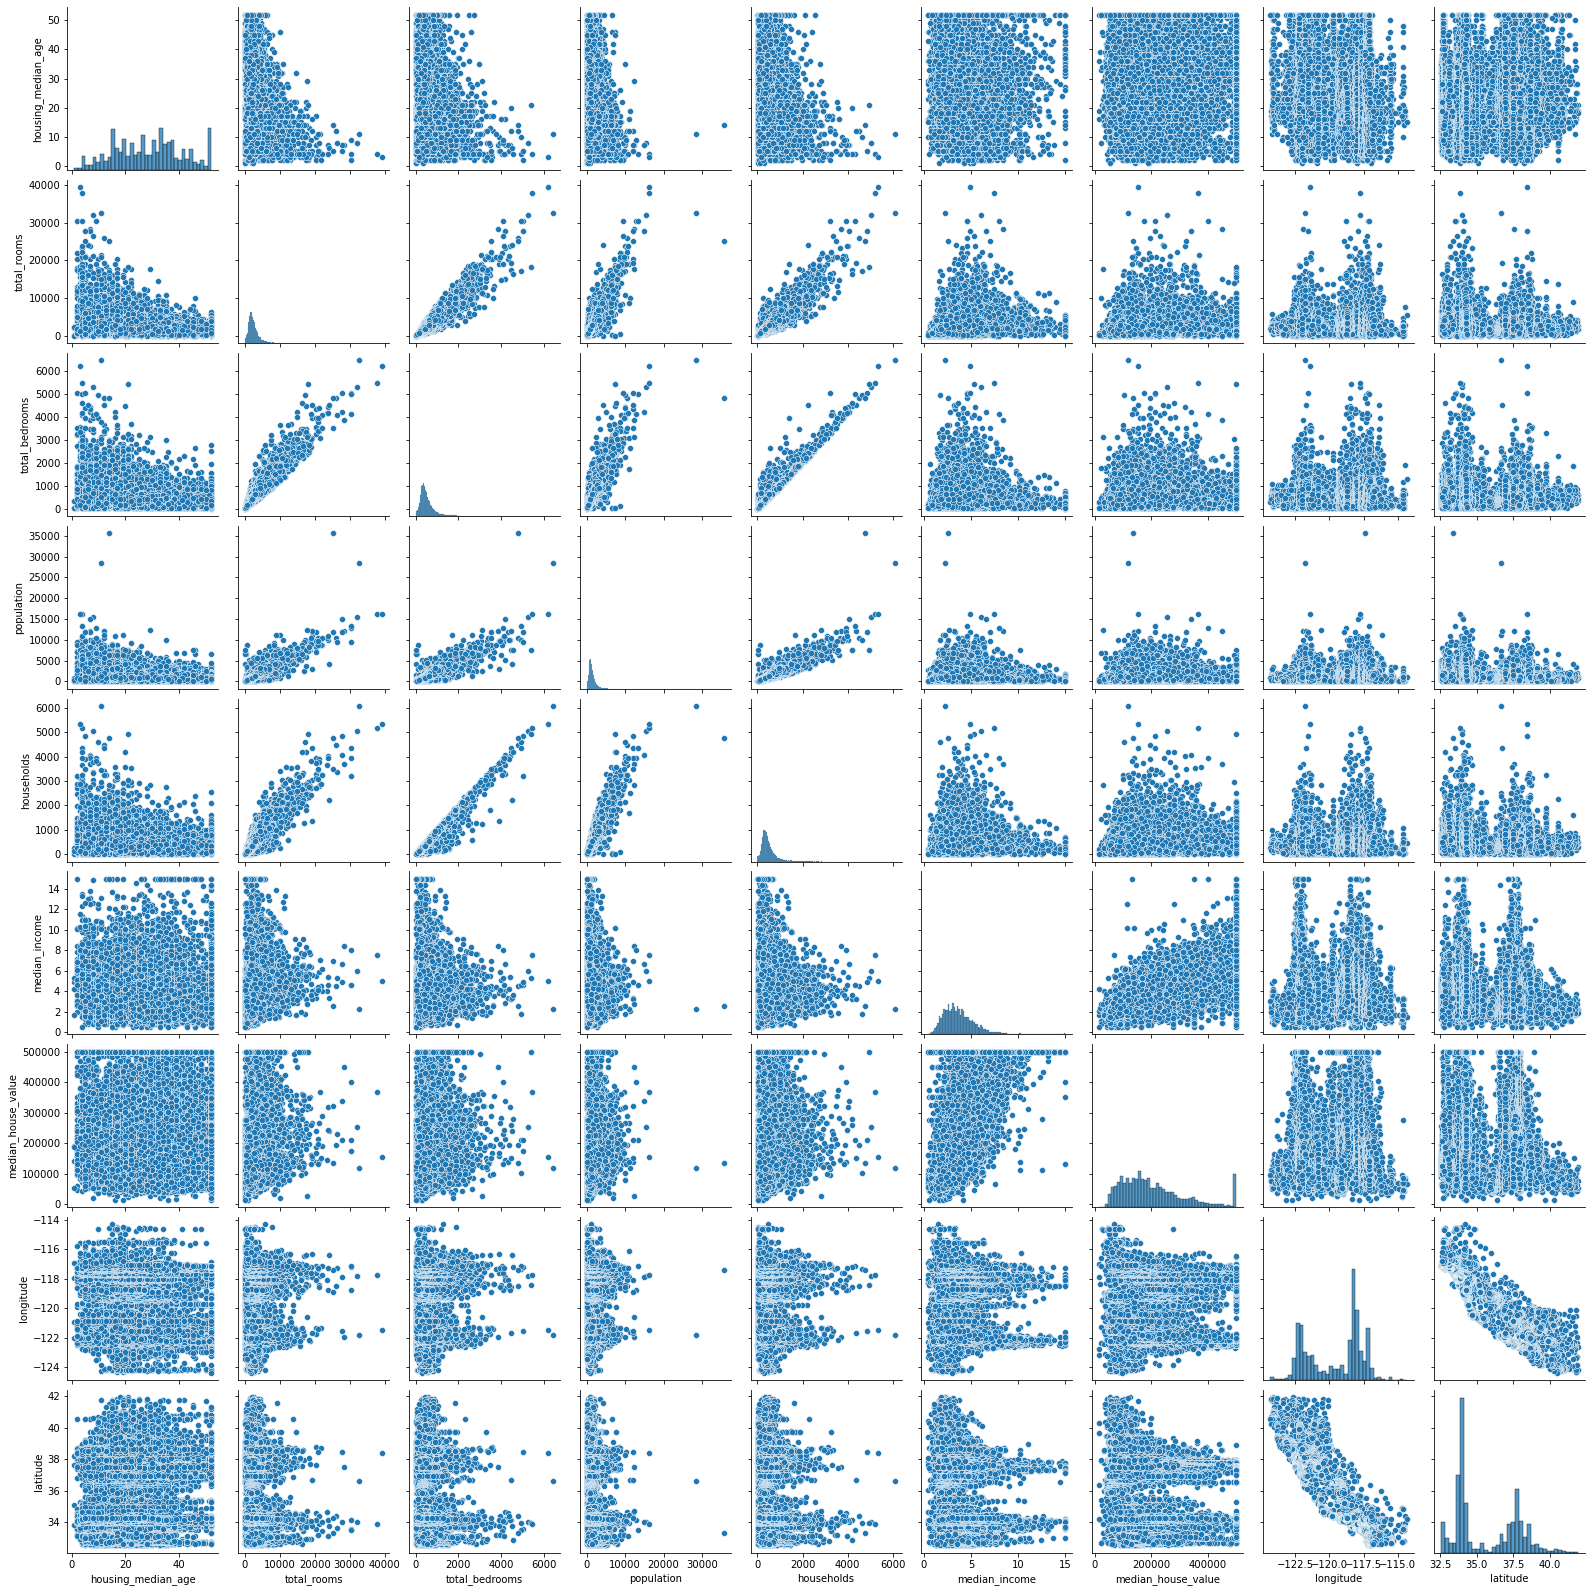

In [12]:
sns.pairplot(housing_df[['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income',
              'median_house_value','longitude','latitude']])
plt.show()

There are no strong trends between median_house_value and any other feature variables other than median_income


Also a linear relation is seen only between 'households' and 'total_rooms' and 'total_bedrooms' which follows logically. 

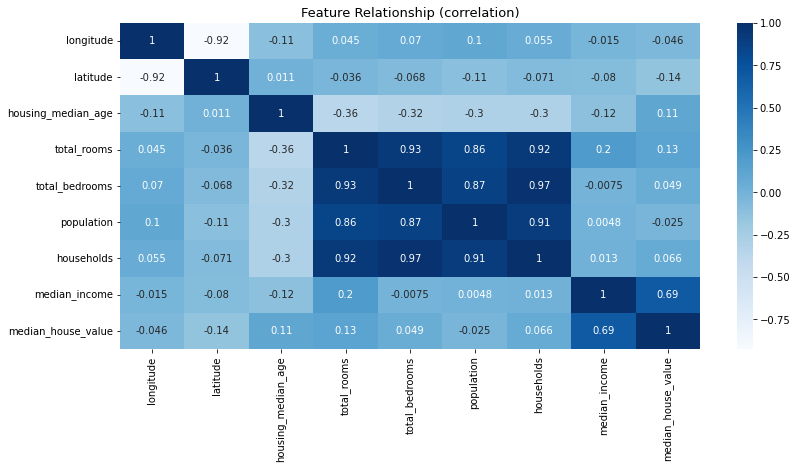

In [86]:
# let's see how the features are related
plt.figure(figsize=(13,6))
sns.heatmap(housing_df.corr(),
            annot=True,
            cmap="Blues")
plt.title("Feature Relationship (correlation)", size=13)
plt.show()

# Seperating the data into features and target

In [72]:
X_features = housing_df[['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income',
              'longitude','latitude']]
y_target = housing_df['median_house_value']

In [73]:
from sklearn.model_selection import train_test_split
# select the features
X = housing_df.drop (['median_house_value','housing_median_age','median_income'], axis = 1)

#select the label/target
y = housing_df['median_house_value']

#ivide the dataset into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.25,
                                                   random_state=42)
print(X.shape)
print(y.shape)

(20640, 6)
(20640,)


In [64]:
#Print the shape of the Original and Test train data splits
#print(x_features.shape)
#print(x_train.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_test.shape)

# linear regression

In [74]:
# instantiate the linear regression algorithm
reg = LinearRegression()

# fit on training data
linear_model = reg.fit(X_train,y_train)

# get the evaluation metrics
print("R2 Test",r2_score(y_test,linear_model.predict(X_test)))
print("R2 Train",r2_score(y_train,linear_model.predict(X_train)))



R2 Test 0.3715691342030617
R2 Train 0.3793724221305792


In [76]:
#import ridge regression
from sklearn.linear_model import Ridge

#instantiate
ridge = Ridge()

#fit
ridge_model = ridge.fit(X_train, y_train)

#get metrics
print("R2 Test",r2_score(y_test, ridge_model.predict(X_test)))
print("R2 Train",r2_score(y_train, ridge_model.predict(X_train)))

R2 Test 0.37156238926138185
R2 Train 0.3793724114568773


In [75]:
from sklearn.linear_model import Lasso
lasso = Lasso()

#fit
laso_model = lasso.fit(X_train.values, y_train)

#get metrics
print("R2 Test",r2_score(y_test, laso_model.predict(X_test)))
print("R2 Train",r2_score(y_train, laso_model.predict(X_train)))

R2 Test 0.3715677288925602
R2 Train 0.37937242164005913


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [85]:
new_house_features = np.arange(6)
laso_model.predict([new_house_features])

array([-5853808.63814358])